In [1]:
# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

In [ ]:
# PyKoSpacing 설치
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
# from konlpy.tag import Mecab
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [4]:
okt = Okt()
tokenizer = Tokenizer()
max_len = 20
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '요', '로', '하고', '으로']


In [5]:
# test
# test_sentense = '1부2주 다른거 알랴주세영~~~~'
# test_sentense = test_sentense.replace("\n", " ")

In [10]:
text = [
'매일유업♥♥♥♥♥ 요미요미튼튼씨리얼-고구마바나나맛 상하목장마이리틀플레인 상하치즈 유기농 어린이치즈 3단계',
'착한기업 매일유업 응원해요^^♡ 제품도 좋고 맛있어서 자주 구매하고 선호하는 브랜드랍니다~~ 오늘 라이브 방송 혜택도 정말 좋네요 득템해서 신나요ㅎ',
'권혁수 서수경님 이시네 방소 ㅇ재미있겟네여', 
'좋아보여요',
'와우',
'이르셔',
'목소리 너무 매력있어요 언니 🥰',
'우연히 로그인했다 방송 시작한다길래 들어왔어요ㅋㅋㅋ',
'활기차게 시작하네요']

### 1. model_1 : biLSTM

In [11]:
loaded_model = load_model('201103_model_1DCNN.h5')

max_len = 20

def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 [긍정] 리뷰입니다.(score : {})".format(score * 100, score))
    else:
        print("{:.2f}% 확률로 [긍정 외] 리뷰입니다.(score : {})".format((1 - score) * 100, score))

In [12]:
# sentiment_predict(test_sentense)

In [13]:
for i in text:
    sentiment_predict(i)

57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)
57.77% 확률로 [긍정] 리뷰입니다.(score : 0.5776535868644714)


### 2. model_2 : 1D-CNN

In [13]:
loaded_model = load_model('201103_model_1DCNN.h5')

def sentiment_predict2(new_sentence):
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 [긍정] 리뷰입니다.(score : {})".format(score * 100, score))
    else:
        print("{:.2f}% 확률로 [긍정 외] 리뷰입니다.(score : {})".format((1 - score) * 100, score))

In [14]:
for i in text:
    sentiment_predict2(i)

71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)
71.01% 확률로 [긍정 외] 리뷰입니다.(score : 0.28993478417396545)


In [52]:
loaded_model = load_model('201019_model_1DCNN.h5')

def sentiment_predict2(new_sentence):
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.(score : {})".format(score * 100, score))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.(score : {})".format((1 - score) * 100, score))

In [53]:
sentiment_predict2(test_sentense)

61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)


In [54]:
for i in text:
    sentiment_predict2(i)

61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)
61.90% 확률로 부정 리뷰입니다.(score : 0.38098230957984924)


### 1.자료 불러오기 : Naver쇼핑 리뷰

In [2]:
# 필요한 자료 다운로드
# urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

In [2]:
# data1 불러오기
total_data1 = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수(일반제품) :',len(total_data1)) # 전체 리뷰 개수 출력

전체 리뷰 개수(일반제품) : 200000


In [3]:
# data2 불러오기
total_data2 = pd.read_excel('./20200923_NAVER_REVIEW_INFO.xlsx','Sheet1')
total_data2 = total_data2[['REVIEW', 'REVIEW_SCORE']]
total_data2.rename(columns = {'REVIEW' : 'reviews', 'REVIEW_SCORE' : 'ratings'}, inplace = True)
print('전체 리뷰 개수(자세제품) :',len(total_data2)) # 전체 리뷰 개수 출력

전체 리뷰 개수(자세제품) : 431430


In [4]:
total_data2['reviews'] = total_data2['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
total_data2['reviews'] = total_data2['reviews'].replace("\n", " ")

In [96]:
%%time

from hanspell import spell_checker

# len(total_data2)
for i in range(0, 10000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Wall time: 6min 48s


In [97]:
%%time

for i in range(10001, 50000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 27min 24s


In [98]:
%%time

for i in range(50001, 100000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 38min 11s


In [99]:
%%time

for i in range(100001, 150000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [ ]:
%%time

for i in range(150001, 200000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%time

for i in range(200001, 250000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

In [ ]:
%%time

for i in range(250001, 300000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

In [ ]:
%%time

for i in range(300001, 350000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

In [ ]:
%%time

for i in range(350001, 400000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

In [ ]:
%%time

for i in range(400001, 450000):
    spelled_sent = spelled_sent = spell_checker.check(total_data2['reviews'][i])
    total_data2['reviews'][i] = spelled_sent.checked

In [93]:
total_data2.to_excel('20201023_NAVER_REVIEW_INFO_v2.xlsx', sheet_name= 'Sheet1' )

In [5]:
total_data = pd.concat([total_data1,total_data2], ignore_index=True)

In [6]:
total_data.tail()

,ratings,reviews
631425,5,연하지 않고 딱 좋네요
631426,5,빠른 배송 감사합니다
631427,4,잘마시겠습니다 좋아요
631428,5,발송 늦는다고 하셨는데 그렇게 안늦었네요
631429,5,빠른배송 좋아요


### 2.데이터 전처리/Set 분류

In [7]:
# 긍종/부정으로 나누기
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

# 중복 제거
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()
total_data.drop_duplicates(subset=['reviews'], inplace=True) 

In [8]:
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 571990


In [9]:
# train_data['label'].value_counts().plot(kind = 'bar')
# plt.show()

In [10]:
# train/test Set 분류
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 428992
테스트용 리뷰의 개수 : 142998


### 3.데이터 정제/토큰화

In [11]:
# 정규 표현식 수행 : train
train_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행

# Null 값 제거 : train
train_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거


# 정규 표현식 수행 : test
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행

# Null 값 제거 : test
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [12]:
print('전처리 후 훈련 샘플의 개수 :',len(train_data))
print('전처리 후 테스트 샘플의 개수 :',len(test_data))

전처리 후 훈련 샘플의 개수 : 428991
전처리 후 테스트 샘플의 개수 : 142998


In [13]:
%%time

okt = Okt()

# token화
# mecab = Mecab()
# print(okt.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '요', '로', '하고', '으로']

# token화 : train
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

# token화 : test
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


Wall time: 24min 14s


### 4.단어와 길이 분포 확인하기 

In [14]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [15]:
negative_word_count = Counter(negative_words)
positive_word_count = Counter(positive_words)

print(negative_word_count.most_common(10))
print(positive_word_count.most_common(10))

[('너무', 13962), ('안', 12243), ('배송', 11812), ('잘', 9717), ('그냥', 9033), ('맛', 6494), ('했는데', 6099), ('별로', 5797), ('좀', 5689), ('제품', 5642)]
[('잘', 79612), ('좋아요', 69374), ('배송', 67072), ('맛', 50372), ('우유', 35844), ('구매', 34531), ('주문', 29528), ('너무', 26114), ('맛있어요', 24294), ('유통', 24219)]


In [16]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [17]:
# negative_word_count.most_common(20)

### 5.정수 인코딩 

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 122768
등장 빈도가 1번 이하인 희귀 단어의 수: 68031
단어 집합에서 희귀 단어의 비율: 55.41427733611365
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.5342629737246387


In [19]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 54739


In [20]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

### 6.패딩 : 샘플들의 길이를 동일하게 맞춰주는 작업

리뷰의 최대 길이 : 1543
리뷰의 평균 길이 : 10.336151574275451


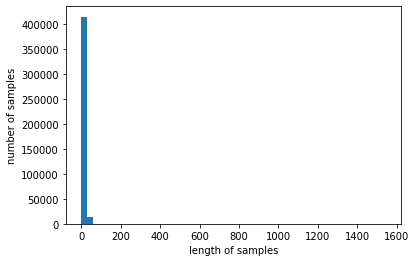

In [21]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [23]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.96643286222789


In [24]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

### 7.모델링 : 1D CNN
 + Activation : sigmoid
 + Optimizer : RMSprop
 + Metrics : binary_crossentropy

In [7]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         5473900   
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 5,562,349
Trainable params: 5,562,349
Non-trainable params: 0
_________________________________________________________________


In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('201019_model_1DCNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
5720/5720 [==============================] - ETA: 0s - loss: 0.2016 - acc: 0.9317
Epoch 00001: val_acc improved from -inf to 0.93864, saving model to 201019_model_1DCNN.h5
5720/5720 [==============================] - 856s 150ms/step - loss: 0.2016 - acc: 0.9317 - val_loss: 0.1876 - val_acc: 0.9386
Epoch 2/15
5720/5720 [==============================] - ETA: 0s - loss: 0.1763 - acc: 0.9432
Epoch 00002: val_acc improved from 0.93864 to 0.94120, saving model to 201019_model_1DCNN.h5
5720/5720 [==============================] - 852s 149ms/step - loss: 0.1763 - acc: 0.9432 - val_loss: 0.1805 - val_acc: 0.9412
Epoch 3/15
5720/5720 [==============================] - ETA: 0s - loss: 0.1674 - acc: 0.9473
Epoch 00003: val_acc improved from 0.94120 to 0.94254, saving model to 201019_model_1DCNN.h5
5720/5720 [==============================] - 917s 160ms/step - loss: 0.1674 - acc: 0.9473 - val_loss: 0.1763 - val_acc: 0.9425
Epoch 4/15
5720/5720 [==============================] - ETA: 0s 

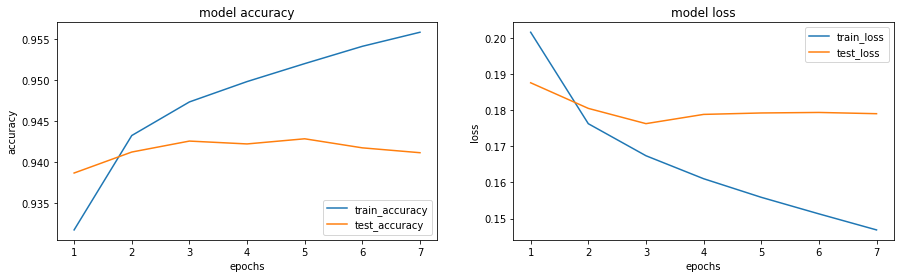

In [34]:
# 5. model evalustion : v1
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')

plt.subplot(1,2,2)
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'test_loss'], loc='upper right')
plt.show()

In [ ]:
# history.save('best_model_1DCNN.h5')

### 8.모델링 : biLSTM

In [46]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [47]:
import graphviz 

In [48]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [49]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [52]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('201020_model_biLSTM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

### 9.결과평가

In [69]:
i = 15500
text, scroe = total_data2['reviews'][i], total_data2['ratings'][i]
print('원문 : {}\n'.format(text))
sentiment_predict(text)

원문 : 배송 암청 빠릅니다

86.89% 확률로 긍정 리뷰입니다.(score : 0.8689199090003967)


In [51]:
score_list = [] 
for i in range(1500):
    text, scroe = total_data2['reviews'][i], total_data2['ratings'][i]
    new_sentence = okt.morphs(text) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score_list.append(float(loaded_model.predict(pad_new))) # 예측


In [68]:
total_data2['reviews'][15500]

'배송 암청 빠릅니다'

In [56]:
new_sentence

['떨어지기', '전', '구매', '하는', '상품', '임다']

In [58]:
encoded

[[2049, 150, 7, 123, 70, 6242]]

In [59]:
pad_new

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 2049,  150,    7,
         123,   70, 6242]])

In [52]:
# score_list

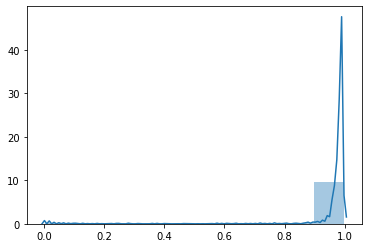

In [54]:
import seaborn as sns
sns.distplot(score_list, bins =10)
plt.show()

In [35]:
df2 = pd.read_excel('./20200923_NAVER_REVIEW_INFO.xlsx','Sheet1')

In [36]:
df2.tail()

,NAME,REVIEW,REVIEW_SCORE
431425,[매일유업] 바리스타룰스 코스타리카 330ml 12팩,연하지 않고 딱 좋네요,5
431426,[매일유업] 바리스타룰스 코스타리카 330ml 12팩,빠른 배송 감사합니다.,5
431427,[매일유업] 바리스타룰스 코스타리카 330ml 12팩,잘마시겠습니다 좋아요,4
431428,[매일유업] 바리스타룰스 코스타리카 330ml 12팩,발송 늦는다고 하셨는데 그렇게 안늦었네요,5
431429,[매일유업] 바리스타룰스 코스타리카 330ml 12팩,빠른배송 좋아요,5


In [62]:
df2['predict_biLSTM'] = 0

In [63]:
from datetime import date, time, datetime

loaded_model_biLSTM = load_model('201019_model_1DCNN.h5')
# predict_score = []

for i in range(len(df2['REVIEW'])):
    new_sentence = okt.morphs(df2['REVIEW'][i])                               # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence])                    # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len)                        # 패딩
    df2['predict_biLSTM'][i] = float(loaded_model_biLSTM.predict(pad_new))    # 예측
    if i % 1000 == 0:
        print('{} 번째 자료까지 예측 완료! (진행율 : {}% / {})'.format(i, round(i/len(df2['REVIEW'])*100,3),  str(datetime.now())) )


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0 번째 자료까지 예측 완료! (진행율 : 0.0% / 2020-10-19 13:22:07.855222)
1000 번째 자료까지 예측 완료! (진행율 : 0.2% / 2020-10-19 13:24:59.352651)
2000 번째 자료까지 예측 완료! (진행율 : 0.5% / 2020-10-19 13:30:19.274690)
3000 번째 자료까지 예측 완료! (진행율 : 0.7000000000000001% / 2020-10-19 13:32:20.364262)
4000 번째 자료까지 예측 완료! (진행율 : 0.8999999999999999% / 2020-10-19 13:34:03.742988)
5000 번째 자료까지 예측 완료! (진행율 : 1.2% / 2020-10-19 13:40:19.855041)
6000 번째 자료까지 예측 완료! (진행율 : 1.4000000000000001% / 2020-10-19 13:42:14.231386)
7000 번째 자료까지 예측 완료! (진행율 : 1.6% / 2020-10-19 13:44:24.627130)
8000 번째 자료까지 예측 완료! (진행율 : 1.9% / 2020-10-19 13:46:15.020573)
9000 번째 자료까지 예측 완료! (진행율 : 2.1% / 2020-10-19 13:57:14.760995)
10000 번째 자료까지 예측 완료! (진행율 : 2.3% / 2020-10-19 13:59:32.061179)
11000 번째 자료까지 예측 완료! (진행율 : 2.5% / 2020-10-19 14:02:24.991931)
12000 번째 자료까지 예측 완료! (진행율 : 2.8000000000000003% / 2020-10-19 14:07:20.356814)
13000 번째 자료까지 예측 완료! (진행율 : 3.0% / 2020-10-19 14:26:55.848239)
14000 번째 자료까지 예측 완료! (진행율 : 3.2% / 2020-10-19 14:28:26.537262)
15000 번째

ResourceExhaustedError:  OOM when allocating tensor with shape[42019,100] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential/embedding/embedding_lookup/Read/ReadVariableOp (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_632287]

Function call stack:
distributed_function


In [123]:
df2.to_excel('20200923_NAVER_REVIEW_INFO_v2.xlsx', sheet_name= 'Sheet1' )